# Multi-Table Synthesis from a Relational Database

Relational databases (RDBMS) are a type of data storage that allows users to access data that is stored in various tables connected through primary and foreign keys. They serve a variety of different use cases, as they offer benefits such as security and reliability.

For many data science scenarios, a single-table model is usually the go-to, but the truth is that RDBMS and table-like storages are important for more complex use cases, such as systems testing, replicating a database for customer segmentation, or even for data migrations between on-prem and the cloud.

YData Fabric offers an easy-to-use and familiar interface through the SDK to support Multi-Table Synthesis. With the SDK and a few lines of code, users can replicate full relational databases while maintaining the consistency of all the keys and the statistical information of cross-table relations.

[Berka](https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions) is the dataset chosen to demo Fabric Multi-Table synthesis properties and interface.

## Getting your database from the Data Catalog

In this example we have create our database in a MySQL server and [created a Dataset in Fabric Data Catalog](https://docs.sdk.ydata.ai/0.10/get-started/create_multitable_dataset/). Copy the required code snippet by clicking in the "Explore in Labs" button that you can find inside of the dataset detail as per the image below.

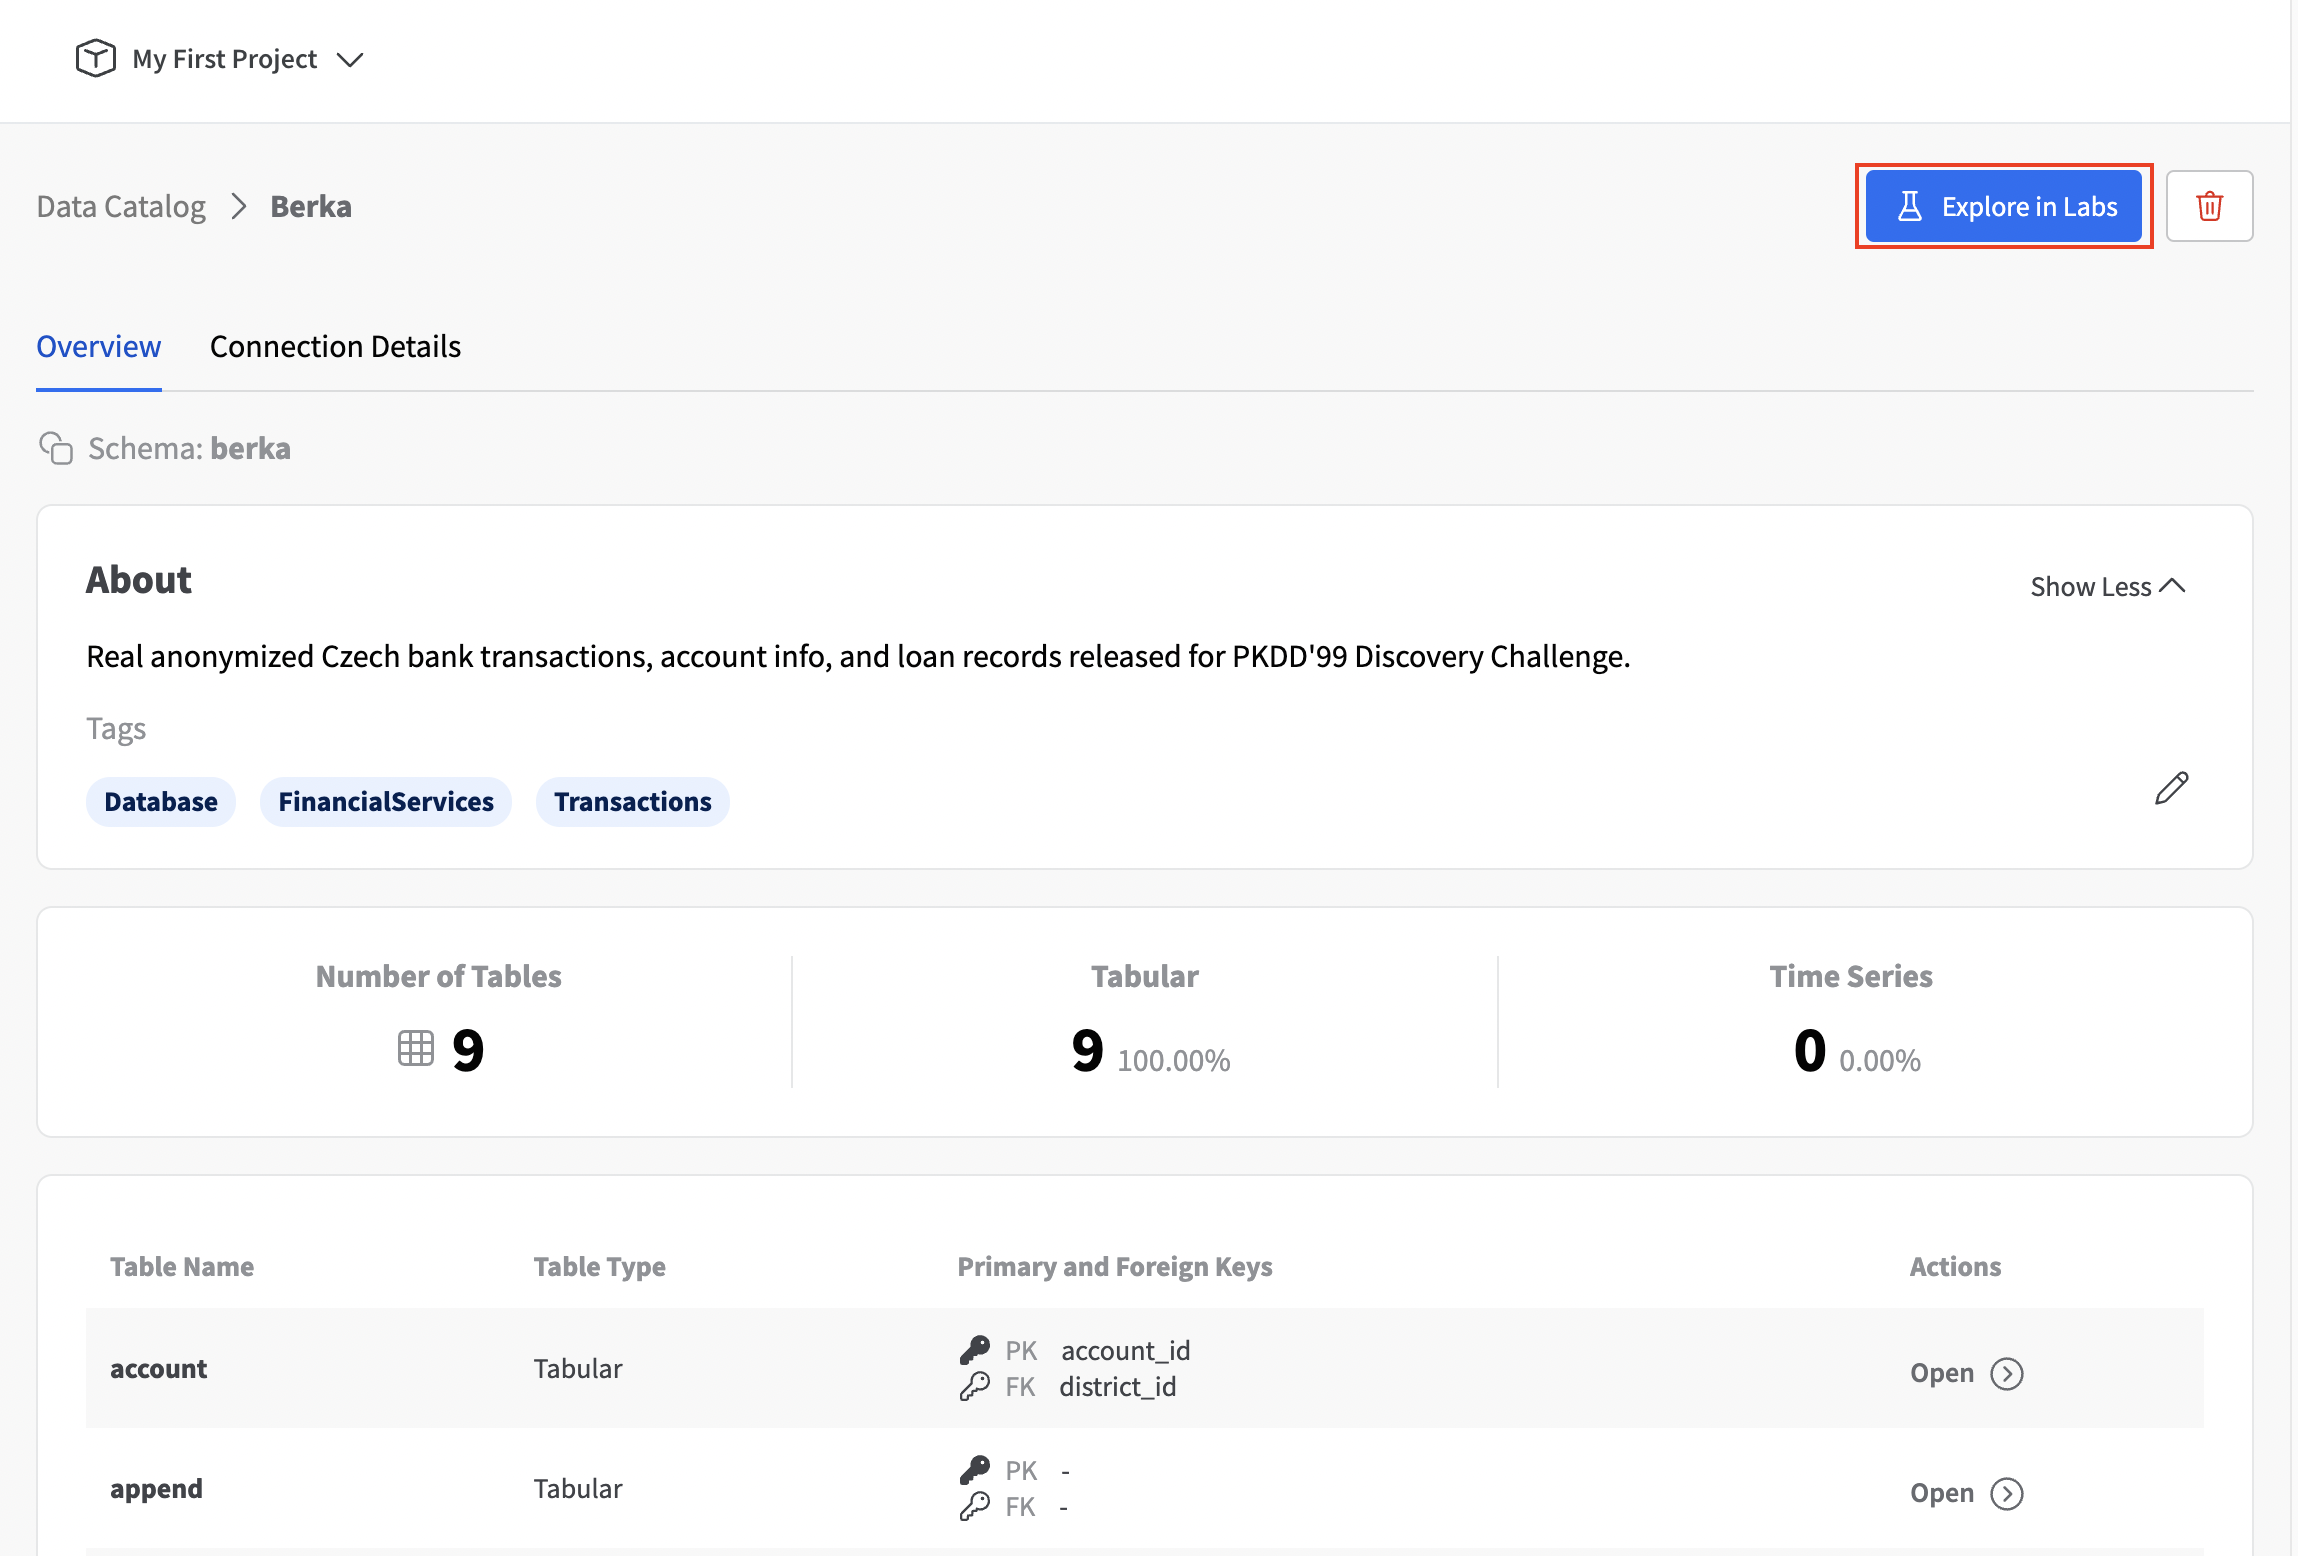

In [1]:
# Importing YData's packages
from ydata.labs import DataSources
# Reading the Dataset from the DataSource
datasource = DataSources.get(uid='1a068d4c-0e25-4653-adee-78aa3aeeb084', 
                             namespace='44617fb3-5ada-4c33-b0f3-a7c1a3f1a3f5')

#datasource = DataSources.get(uid='{insert-datasource-uid}')

dataset = datasource.dataset
# Getting the calculated Metadata to get the profile overview information in the labs
metadata = datasource.metadata
print(metadata)

/home/ydata/.venv/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 9.55 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/home/ydata/.venv/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 9.55 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/home/ydata/.venv/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 9.55 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/home/ydata/.venv/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 9.55 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/home/ydata/.venv/lib/python3.10/site-packages/distributed/client.py:3163: U

MultiMetadata Summary 
 
Number of tables: 9 
 
  Table name  # cols Primary keys             Foreign keys PK characteristics                           FK characteristics Notes
0     append       3                                                                                                            
1   district      16           a1                                        [id]                                                   
2    account       4   account_id            [district_id]               [id]                      {'district_id': ['id']}      
3     client       6    client_id            [district_id]               [id]                      {'district_id': ['id']}      
4       disp       4      disp_id  [client_id, account_id]               [id]  {'client_id': ['id'], 'account_id': ['id']}      
5       loan       9      loan_id             [account_id]               [id]                       {'account_id': ['id']}      
6      order       6     order_id             [ac

## Training & sampling a Database Synthetic Data generator

We can now train the synthesizer by creating a `MultiTableSynthesizer` and passing the data and the metadata.

In [3]:
from ydata.synthesizers import MultiTableSynthesizer

synth = MultiTableSynthesizer()
synth.fit(dataset, metadata)

INFO: 2024-02-07 23:38:06,400 (1/9) - Fitting table: [district]
INFO: 2024-02-07 23:38:09,674 [SYNTHESIZER] - Number columns considered for synth: 16
INFO: 2024-02-07 23:38:09,963 [SYNTHESIZER] - Starting the synthetic data modeling process over 1x1 blocks.
INFO: 2024-02-07 23:38:09,966 [SYNTHESIZER] - Preprocess segment
INFO: 2024-02-07 23:38:09,973 [SYNTHESIZER] - Synthesizer init.
INFO: 2024-02-07 23:38:09,975 [SYNTHESIZER] - Processing the data prior fitting the synthesizer.
INFO: 2024-02-07 23:38:10,291 (2/9) - Fitting table: [client]
INFO: 2024-02-07 23:38:14,551 [SYNTHESIZER] - Number columns considered for synth: 22
INFO: 2024-02-07 23:38:15,002 [SYNTHESIZER] - Starting the synthetic data modeling process over 1x1 blocks.
INFO: 2024-02-07 23:38:15,005 [SYNTHESIZER] - Preprocess segment
INFO: 2024-02-07 23:38:15,013 [SYNTHESIZER] - Synthesizer init.
INFO: 2024-02-07 23:38:15,014 [SYNTHESIZER] - Processing the data prior fitting the synthesizer.
INFO: 2024-02-07 23:38:16,666 (3/9

To generate the synthetic data we call the `sample` method.

Since there is a need to keep the consistency of the tables, as well as the referential integrity, to sample from trained synthesizers the number of records is set through a ratio based on the original number of records (e.g., 1.0 is equivalent to the size of the original database).

In [4]:
sample = synth.sample(n_samples=1.)
print(sample)

INFO: 2024-02-07 23:39:23,329 (1/9) - Synthesizing table: district
INFO: 2024-02-07 23:39:23,330 [SYNTHESIZER] - Start generating model samples.
INFO: 2024-02-07 23:39:24,176 (2/9) - Synthesizing table: client
INFO: 2024-02-07 23:39:24,421 [SYNTHESIZER] - Start generating model samples.
INFO: 2024-02-07 23:39:25,553 (3/9) - Synthesizing table: disp
INFO: 2024-02-07 23:39:25,659 [SYNTHESIZER] - Start generating model samples.
INFO: 2024-02-07 23:39:26,367 (4/9) - Synthesizing table: card
INFO: 2024-02-07 23:39:26,431 [SYNTHESIZER] - Start generating model samples.
INFO: 2024-02-07 23:39:27,129 (5/9) - Synthesizing table: account
INFO: 2024-02-07 23:39:27,246 [SYNTHESIZER] - Start generating model samples.
INFO: 2024-02-07 23:39:27,780 (6/9) - Synthesizing table: order
INFO: 2024-02-07 23:39:27,853 [SYNTHESIZER] - Start generating model samples.
INFO: 2024-02-07 23:39:29,114 (7/9) - Synthesizing table: loan
INFO: 2024-02-07 23:39:29,224 [SYNTHESIZER] - Start generating model samples.
INF

We can now display the sampled data of the `account` and `order` tables.

In [5]:
sample['account'].head()

,account_id,district_id,frequency,date
0,1,1.0,POPLATEK MESICNE,930226
1,2,1.0,POPLATEK MESICNE,950324
2,3,12.0,POPLATEK MESICNE,930226
3,4,5.0,POPLATEK MESICNE,970707
4,5,15.0,POPLATEK MESICNE,960221


## Validate the quality of the Synthetic database relations

To validate the quality of the synthetic database relationships compare to what is observed in the original dataset, it is needed to compute the `MultiMetadata` for the Synthetic sample database, as we use this object as part of the comparision. 

In [7]:
from ydata.metadata.multimetadata import MultiMetadata

m_sample = MultiMetadata(sample)
print(m_sample.get_schema_validation_summary(metadata, sample, dataset))

Schema Validation Summary

Number of Primary Key Violations: 0
Number of Foreign Key Violations: 0
Relationship Quality: 100%


Table append

	Primary Keys
		Current Schema: None
		Reference Schema: None

	Non-Matching Primary Keys: None

	Non-Matching Foreign Keys: None


Table district

	Primary Keys
		Current Schema: a1 [VALID]
		Reference Schema: a1 [VALID]

	Non-Matching Primary Keys: None

	Non-Matching Foreign Keys: None


Table account

	Primary Keys
		Current Schema: account_id [VALID]
		Reference Schema: account_id [VALID]

	Foreign Key 1
		Current Schema: district_id -> district.a1 (1-N)
		Reference Schema: district_id -> district.a1 (1-N)

	Percentage of Valid Foreign Keys
		Current Schema: 100%
		Reference Schema: 100%

	Non-Matching Primary Keys: None

	Non-Matching Foreign Keys: None


Table client

	Primary Keys
		Current Schema: client_id [VALID]
		Reference Schema: client_id [VALID]

	Foreign Key 1
		Current Schema: district_id -> district.a1 (1-N)
		Reference Schema:

## Write the database to a destination database

You can write the generated synthetic database in a destination storage. through the **Data Catalog** and under **Connector** you can add a connector to a new database. Under the actions available for the connectors select "Use in Lab" and copy the code snippet as in the below image. 

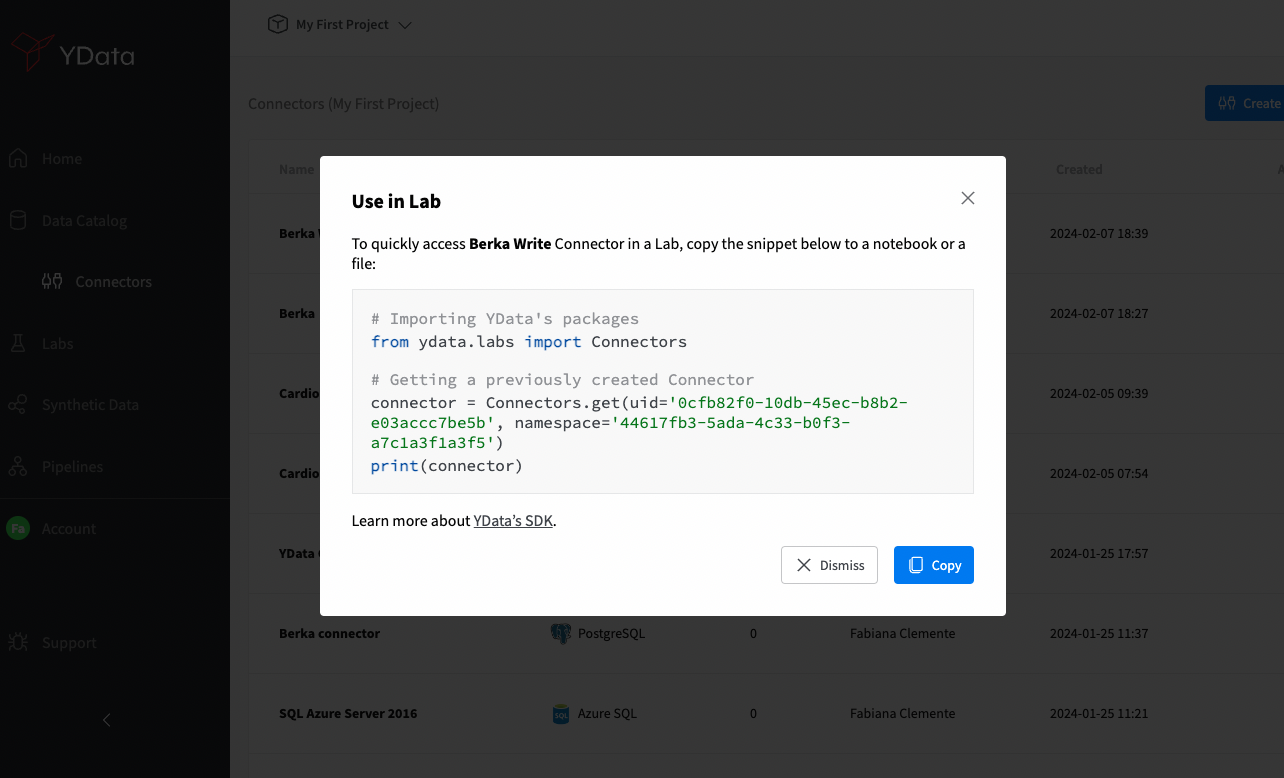

In [8]:
# Importing YData's packages
from ydata.labs import Connectors
# Getting a previously created Connector
connector = Connectors.get(uid='0cfb82f0-10db-45ec-b8b2-e03accc7be5b', 
                           namespace='44617fb3-5ada-4c33-b0f3-a7c1a3f1a3f5')
print(connector)


MySQLConnector(
  
  uid='0cfb82f0-10db-45ec-b8b2-e03accc7be5b',
  name='Berka Write',
  type=ConnectorType.MYSQL,
  connection=Connection(host='data-science-mysql-41955.c1xxv3f18hni.eu-west-1.rds.amazonaws.com', port=3306),
  database=berka_write)


In [14]:
connector.write_database(data=sample)